<a href="https://colab.research.google.com/github/jonahcoutinho/Machine-Learning/blob/main/KMeans_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ns cluster we need to find the number of clusters. the way we do that is by finidng the optimum number of clusters by finding MSE for each poiut by increasing the number of clusters. now drow a plot. finally you will notice that the curve flattens. 
You may also ask...
Why not let the curve flatten ? the answer to this is , if we increse the clusters blindly you will just reach a point where no. of clusters is equal to no of data points.
hence we look for elbow point in graph
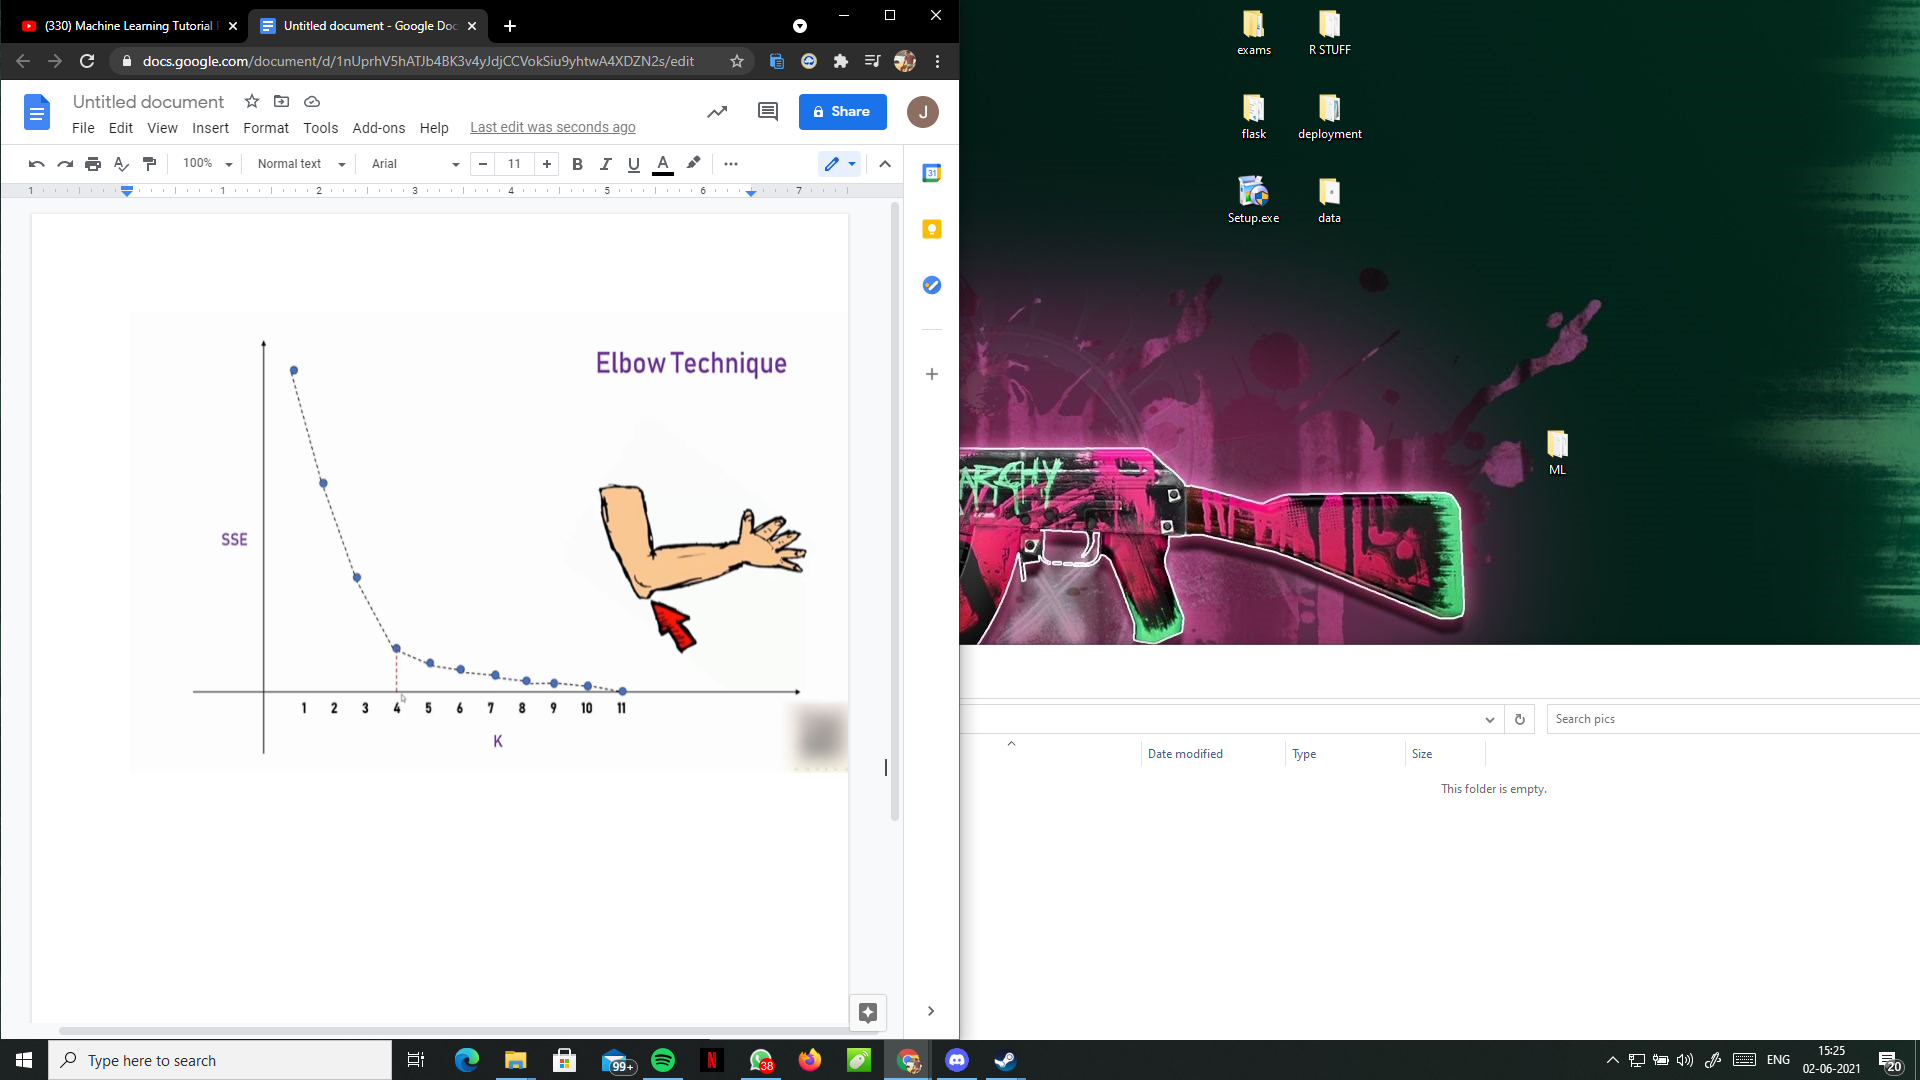

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [39]:
df=pd.read_csv('/content/income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [40]:
df.rename(columns={'Income($)':'Income'},inplace=True)
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [41]:
#create a scatter plot

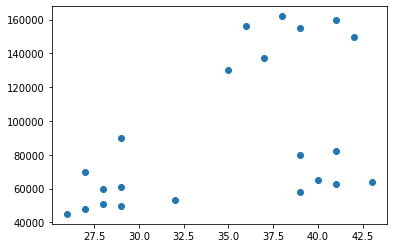

In [42]:
plt.scatter(df.Age,df.Income)

In [43]:
#visually we can see three possible clusters


In [44]:
model=KMeans(n_clusters=3)

In [45]:
#here we dont use fit! we use " fit_predict"

In [46]:
pred=model.fit_predict(df[['Age','Income']])

In [47]:
pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

Hard to visualise this?
Lets plot it !

In [48]:
df['clusters']=pred

In [49]:
df

,Name,Age,Income,clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


divide it into separate dfs


In [50]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]

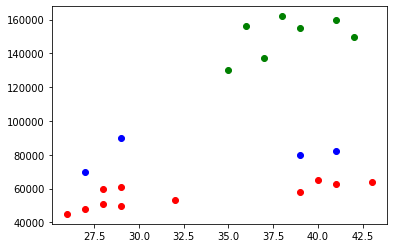

In [51]:
plt.scatter(df0.Age,df0.Income,color='r')
plt.scatter(df1.Age,df1.Income,color='g')
plt.scatter(df2.Age,df2.Income,color='b')

now there is a problem. this is because of scaling. so lets scale


In [52]:
#using min max scaler

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df.Income=scaler.fit_transform(df[['Income']])
df.Age=scaler.fit_transform(df[['Age']])

In [65]:
df

,Name,Age,Income,clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


All Done! now train again


In [66]:
model=KMeans(n_clusters=3)
pred=model.fit_predict(df[['Age','Income']])

In [69]:
pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

Dont forget to append the new clusters to the df and drop the old one :)

In [75]:
df.drop('clusters',axis='columns',inplace=True)
df['clusters']=pred

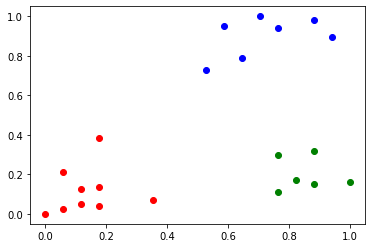

In [76]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]
plt.scatter(df0.Age,df0.Income,color='r')
plt.scatter(df1.Age,df1.Income,color='g')
plt.scatter(df2.Age,df2.Income,color='b')

All done!

In [77]:
#we can check some more detains:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [78]:
#lets visualise these centres

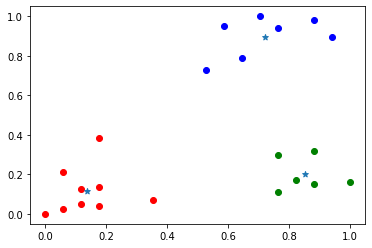

In [79]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]
plt.scatter(df0.Age,df0.Income,color='r')
plt.scatter(df1.Age,df1.Income,color='g')
plt.scatter(df2.Age,df2.Income,color='b')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*')

to fine the n_clusters:

In [83]:
k_rng=range(1,10)
sse=[]
for i in (k_rng):
  model=KMeans(n_clusters=i)
  model.fit(df[['Age','Income']])
  sse.append(model.inertia_)

In [84]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.26217927623452125,
 0.2203764169077066,
 0.16869711728567785,
 0.13781880133764024,
 0.10497488680620905]

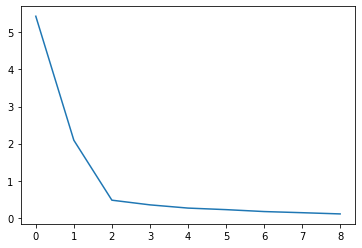

In [85]:
plt.plot(sse)

0,1,2 ====> thats three clusters! using elbow method